<a href="https://colab.research.google.com/github/sarjakpatel/Project/blob/main/SpamDetector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Notebook is divided into 8 main Stages:-
1. Data cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deployment

#Creating the dataframe

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Dataset/spam.csv', encoding='latin-1')
#dataframe created 

In [ ]:
data.head(5)

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#Data Cleaning

In [ ]:
data.shape
#Data consists of 5575 records and 5 columns

(5575, 5)

In [ ]:
#Let's see how many nul values are there in the dataset
data.isnull().sum()

class            0
message          0
Unnamed: 2    5525
Unnamed: 3    5563
Unnamed: 4    5569
dtype: int64

In this dataset, the columns 'class' and 'message' have no null values .On the other hand, the majority of the other 3 columns are empty. Hence , we will remove these columns.

In [ ]:
data.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [ ]:
data.isnull().sum()
#There are no null values

class      0
message    0
dtype: int64

In [ ]:
#Let us rename the remaining columns for our convenience
data = data.rename(columns={'class':'Target','message':'Message'})

In [ ]:
#Let's check for duplicate values
print("There are ", data.duplicated().sum(),"duplicate values.")

There are  405 duplicate values.


There are 405 duplicate records and they needs to be treated properly.

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.dtypes

Target     object
Message    object
dtype: object

In [ ]:
print("There are ", data.duplicated().sum(),"duplicate values.")

There are  0 duplicate values.


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# LE = LabelEncoder()
data['Target']=data['Target'].map({'ham':0, 'spam':1})

In [ ]:
data["Target"] = data["Target"].astype(str).astype(int)

In [ ]:
#After Data cleaning, let us check the shape of the dataset.
data.dtypes

Target      int64
Message    object
dtype: object

#Step 2:- Exploratory Data Analysis(EDA)

In [ ]:
data['Target'].value_counts()

0    4517
1     653
Name: Target, dtype: int64

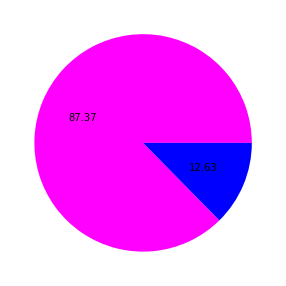

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = [5,5])
mycolor = ['Magenta','blue']
plt.pie(data['Target'].value_counts(),autopct="%0.2f", colors = mycolor)
plt.show()

Text(0.5, 1.0, 'Total Special Request')

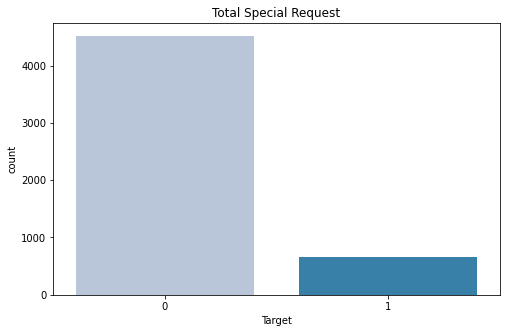

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='Target', data=data, palette = 'PuBu')
plt.title('Total Special Request')

In [ ]:
data.dtypes

Target      int64
Message    object
dtype: object

Now, we will calculate number of words , sentences and characters in each message using Natural Language Toolkit (NLTK) library 

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Creating the column containing number of words
data['Characters'] = data['Message'].apply(len)

In [ ]:
# Creating the column containing number of words
data['Words'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
##Creating the column containing number of sentences
data['Sentences'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
#Let's take a look at the dataset 
data.head(5)

,Target,Message,Characters,Words,Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Now, we will look at the spam and ham messages separately statistically.

In [ ]:
#Spam messages
data[data['Target'] == 1][['Characters','Words','Sentences']].describe()

,Characters,Words,Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


In [ ]:
#Ham messages
data[data['Target'] == 0][['Characters','Words','Sentences']].describe()

,Characters,Words,Sentences
count,4517.000000,4517.000000,4517.000000
mean,70.447199,16.953952,1.815364
std,56.357792,13.394673,1.364001
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


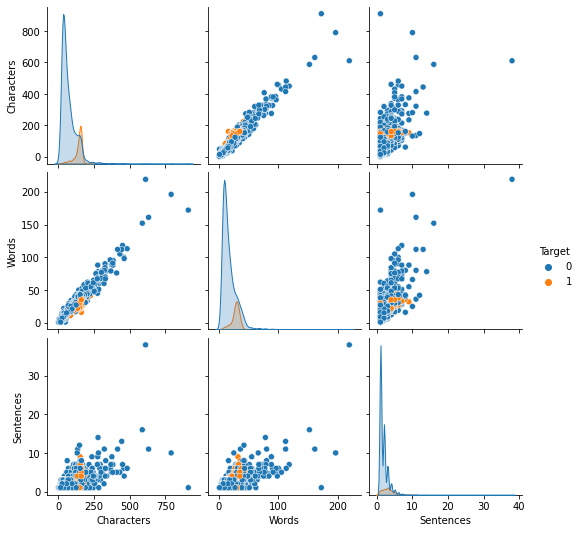

In [ ]:
sns.pairplot(data, hue ='Target')

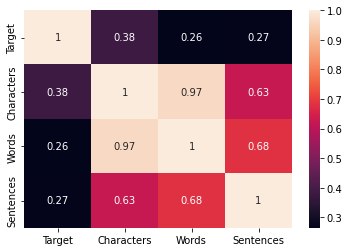

In [ ]:
#Heatmap(Correlation matrix)
sns.heatmap(data.corr(),annot=True)

#Step 3 :- Data Preprocessing
We will start this stage with 5 main parts :-

1) Lowercase

2)Word Tokenization 

3)Removal of punctuations and special characters

4)Removing stop words

5)Stemming

In [ ]:
import nltk
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Example of Porter Stemmer 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('bringing')

'bring'

In [ ]:
from nltk.corpus import stopwords 
def transform(message):
  message = message.lower()
  message = nltk.word_tokenize(message)
  
  y = []
  for i in message:
      if i.isalnum():
          y.append(i)
  
  message = y[:]
  y.clear()
  
  for i in message:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)
          
  message = y[:]
  y.clear()
  
  for i in message:
      y.append(ps.stem(i))
  
          
  return " ".join(y)

In [ ]:
transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [ ]:
data['Processed'] = data['Message'].apply(transform)

Lemmatization.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item.
So, it links words with similar meanings to one word.

In [ ]:
#How lemmatization works ?
# import these modules
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Examples pf lemmatization
print("loving :", lemmatizer.lemmatize("loving"))
print("bests :", lemmatizer.lemmatize("bests"))


loving : loving
bests : best


In [ ]:
def lemmatize(s):
     s = s.split()
     for i in range(len(s)):
       s[i] = lemmatizer.lemmatize(s[i])
     s = " ".join(s)
     return s

data  = data.assign(Processed = data.Processed.apply(lambda x: lemmatize(x)))
# text = "Hello this Jay doing stuff randomly corpora"

# print(lemmatizer.lemmatize(text))

In [ ]:
data.head(10)

,Target,Message,Characters,Words,Sentences,Processed
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
6,0,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,30,2,per request mell oru minnaminungint nurungu ve...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


Now, we will create different  WordClouds for spam and ham messages

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color='white',width=400,height=400,min_font_size=5)

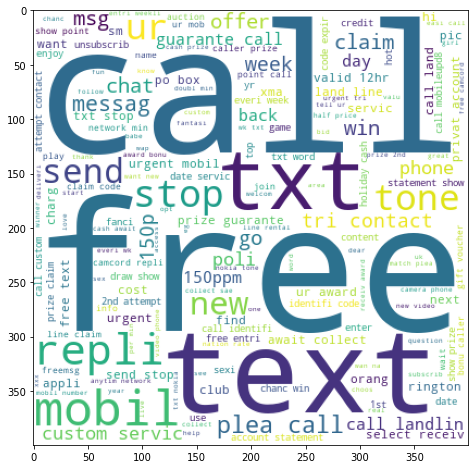

In [ ]:
#Word Cloud for spam messages
spam = cloud.generate(data[data['Target'] == 1]['Processed'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam)

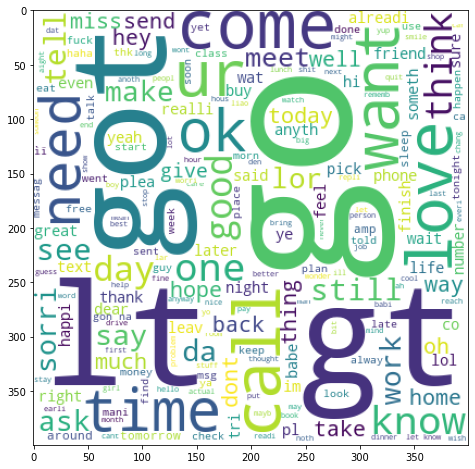

In [ ]:
#Word Cloud for ham messages
spam = cloud.generate(data[data['Target'] == 0]['Processed'].str.cat(sep=" "))
plt.figure(figsize=(15,8))
plt.imshow(spam)

Here, The "Data Preprocessing" stage ends

#Step 4:- Model Building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['Processed']).toarray()
X.shape

(5170, 3000)

In [ ]:
y = data['Target'].values
y.shape

(5170,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#importing the necessary libraries
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='rbf', gamma=1.0)
kneighbors = KNeighborsClassifier()
multinomicalNB = MultinomialNB()
decisionTress = DecisionTreeClassifier(max_depth=5)
logisticRegression = LogisticRegression(solver='liblinear', penalty='l1')
randomForest = RandomForestClassifier(n_estimators=75, random_state=20)
adaBoost = AdaBoostClassifier(n_estimators=75, random_state=20)
extraTrees = ExtraTreesClassifier(n_estimators=75, random_state=20)
gradientBoosting = GradientBoostingClassifier(n_estimators=75,random_state=20)
xgb = XGBClassifier(n_estimators=75,random_state=20)

In [ ]:
seed = 8   
clfs = {
    'SVC' : svc,
    'KneighborsClassifier' : kneighbors, 
    'Multinomial NB': multinomicalNB, 
    'Decision Tree Classifier': decisionTress, 
    'Logistic Regression': logisticRegression, 
    'Random Forest Classifier': randomForest, 
    'Ada Boost Classifier': adaBoost, 
    'Extra Trees Classifier': extraTrees,
    'Gradient Boosting Classifier': gradientBoosting,
    'XGB Classifier': xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  1.0
For  KneighborsClassifier
Accuracy -  0.8984526112185687
Precision -  1.0
For  Multinomial NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  Decision Tree Classifier
Accuracy -  0.925531914893617
Precision -  0.8476190476190476
For  Logistic Regression
Accuracy -  0.9458413926499033
Precision -  0.9051724137931034
For  Random Forest Classifier
Accuracy -  0.9671179883945842
Precision -  0.9915254237288136
For  Ada Boost Classifier
Accuracy -  0.9593810444874274
Precision -  0.9153846153846154
For  Extra Trees Classifier
Accuracy -  0.9738878143133463
Precision -  0.984251968503937
For  Gradient Boosting Classifier
Accuracy -  0.9497098646034816
Precision -  0.9711538461538461
For  XGB Classifier
Accuracy -  0.941972920696325
Precision -  0.9591836734693877


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.969052,1.000000
1,KneighborsClassifier,0.898453,1.000000
2,Multinomial NB,0.970986,1.000000
5,Random Forest Classifier,0.967118,0.991525
7,Extra Trees Classifier,0.973888,0.984252
8,Gradient Boosting Classifier,0.949710,0.971154
9,XGB Classifier,0.941973,0.959184
6,Ada Boost Classifier,0.959381,0.915385
4,Logistic Regression,0.945841,0.905172
3,Decision Tree Classifier,0.925532,0.847619


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(multinomicalNB,open('model.pkl','wb'))